In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob
from scipy.ndimage import gaussian_filter1d
from scipy.stats.stats import pearsonr 

import sys

In [28]:
ae_file = '/mnt/cube/share/07.1_AE_Spectrogram_MNE_Comparison_16x16/AE_res_0707_123_8d.pkl'
with open(ae_file, 'rb') as f:
    ae_res = pickle.load(f)
    
raw_file = '/mnt/cube/share/07.1_AE_Spectrogram_MNE_Comparison_16x16/raw_res_0707_123.pkl'
with open(raw_file, 'rb') as f:
    raw_res = pickle.load(f)

In [29]:
corrs_ar = []
corrs_sig = []
for i in range(214):
    corrs_ar.append(ae_res[i][1][0])
    corrs_sig.append(raw_res[i][1][0])
    

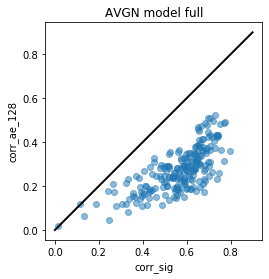

In [30]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(corrs_sig, corrs_ar, alpha=0.5)
plt.plot([0, 0.9], [0, 0.9], color = 'black', linewidth = 2)
ax.set_aspect('equal', adjustable='box')
plt.title('AVGN model full')
plt.xlabel('corr_sig')
plt.ylabel('corr_ae_128')
plt.show()

In [31]:
import scipy
scipy.stats.ttest_rel(corrs_sig, corrs_ar)

Ttest_relResult(statistic=46.066009356340956, pvalue=1.0142687209618274e-112)

In [ ]:
0.15, 1.1035003317991063e-35, 1.3956438092794766e-75

In [17]:
import math
import numpy as np

# Function to find distance
def shortest_distance(x1, y1):      
    p1=np.array([0,0])
    p2=np.array([1,1])
    p3=np.array([x1,y1])
    d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
    #if x1>y1:
    #    d = d*-1
    return d

In [12]:
residual_full = []

for i in range(214):
    d_full = shortest_distance(corrs_sig[i], corrs_ar[i])
    residual_full.append(d_full)

Text(0.5, 0, 'corr_ae')

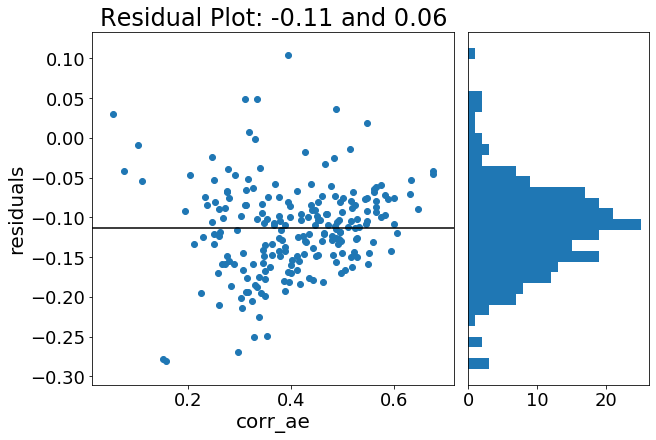

In [13]:
import matplotlib.gridspec as gridspec
from scipy.stats import norm

mu, std = norm.fit(residual_full)

fig = plt.figure(constrained_layout=True, figsize=(9, 6))
gs = fig.add_gridspec(1, 6)

ax_res = fig.add_subplot(gs[0, :4])
ax_res.scatter(corrs_ar, residual_full)
ax_res.grid(False)
ax_res.axhline(y = mu, color='black', linestyle = '-')
ax_res.tick_params(axis='x', labelsize=18)
ax_res.tick_params(axis='y', labelsize=18)

ax_hist = fig.add_subplot(gs[0, 4:])
ax_hist.hist(residual_full, bins=30, orientation="horizontal");
ax_hist.grid(False)
#ax_hist.axhline(y = mu, color='black', linestyle = '-')
ax_hist.set_yticks([])
ax_hist.tick_params(axis='x', labelsize=18)

ax_res.set_title('Residual Plot: {:.2f} and {:.2f}'.format(mu, std), fontsize=24)
ax_res.set_ylabel('residuals', fontsize=20)
ax_res.set_xlabel('corr_ae', fontsize=20)

In [22]:
with open('/mnt/cube/srrudrar/temporal_model/figures/res_full_avgn_128.pkl', 'wb') as f:
    pickle.dump(residual_full, f)